In [7]:
import pqca
import qiskit

In [2]:
'''Circuit Setup'''

tessellated_line = pqca.tessellation.one_dimensional(10,2)

cx_circuit = qiskit.QuantumCircuit(2)
cx_circuit.cx(0,1)
cx_circuit.draw()

initial_state = [0]*10
initial_state[0] = 1
initial_state

update_frame1 = pqca.UpdateFrame(tessellated_line, qiskit_circuit=cx_circuit)
update_frame2 = pqca.UpdateFrame(tessellated_line.shifted_by(1), qiskit_circuit=cx_circuit)

automaton = pqca.Automaton(initial_state, [update_frame1, update_frame2], pqca.backend.qiskit())
automaton.state

automaton.update_circuit.draw()

┌───┐
q_0: ──■───────┤ X ├
     ┌─┴─┐     └─┬─┘
q_1: ┤ X ├──■────┼──
     └───┘┌─┴─┐  │  
q_2: ──■──┤ X ├──┼──
     ┌─┴─┐└───┘  │  
q_3: ┤ X ├──■────┼──
     └───┘┌─┴─┐  │  
q_4: ──■──┤ X ├──┼──
     ┌─┴─┐└───┘  │  
q_5: ┤ X ├──■────┼──
     └───┘┌─┴─┐  │  
q_6: ──■──┤ X ├──┼──
     ┌─┴─┐└───┘  │  
q_7: ┤ X ├──■────┼──
     └───┘┌─┴─┐  │  
q_8: ──■──┤ X ├──┼──
     ┌─┴─┐└───┘  │  
q_9: ┤ X ├───────■──
     └───┘

In [3]:
'''Running the Simulation'''

[next(automaton) for x in range(5)]
automaton.state

[0, 1, 1, 0, 1, 1, 0, 0, 1, 1]

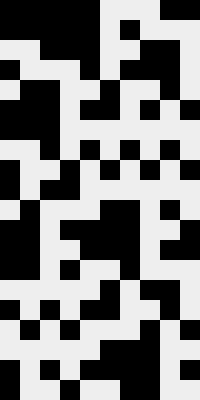

In [30]:
'''Visualizing the Simulation'''
import drawsvg as draw
def automaton_quilt(automaton, number_of_iterations):
    square_size = 20 # in pixels
    drawing = draw.Drawing(square_size*10, square_size*number_of_iterations)
    for iteration in range(number_of_iterations):
        for index, bit in enumerate(automaton.state):
            colour = '#eeeeee' if bit else '#000000'
            rect = draw.Rectangle(index*square_size,(number_of_iterations-iteration-1)*square_size,square_size,square_size, fill=colour)
            drawing.append(rect)
        next(automaton)
    return drawing

automaton_quilt(automaton, 20)

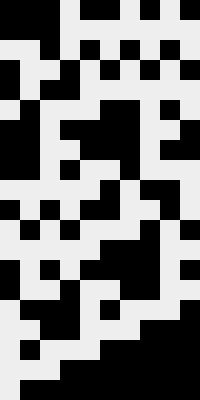

In [34]:
pqca.tessellation.n_dimensional([4,6,5],[2,3,5])
pqca.tessellation.n_dimensional([2,2,2],[1,2,2]).cells
pqca.tessellation.Tessellation([[1,3],[0,2]]).cells
pqca.tessellation.Tessellation([[1,3],[0,2]]).update_names(lambda x: x+2).cells

backend = pqca.backend.qiskit(qiskit.Aer.get_backend('statevector_simulator'))
automaton = pqca.Automaton(initial_state, [update_frame1, update_frame2], backend)
automaton_quilt(automaton, 20)